In [1]:
import os
import yaml
import json
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
yaml_path = "./yaml_data"
yaml_files = [os.path.join(yaml_path,f) for f in os.listdir(yaml_path) if os.path.isfile(os.path.join(yaml_path, f))]

In [3]:
# create pandas df

df = pd.DataFrame()

data = []

for y_file in yaml_files:
    with open(y_file) as f:
        y_dict = yaml.load(f)
        y_dict["donneesNationales"]["date"] = y_dict["date"]
        data.append(y_dict["donneesNationales"])


df = pd.DataFrame(data=data)
df["date"] = pd.to_datetime(df["date"])    
df.set_index("date", inplace=True)
df = df["2020-02-24":]


C:\Users\Andrea\Anaconda2\envs\multipoetgen\lib\site-packages\ipykernel\__main__.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [4]:
usefulCols = ["casConfirmes", "deces", "decesEhpad", "hospitalises", "reanimation", "gueris", "casConfirmesEhpad", "nouvellesHospitalisations", "nouvellesReanimations"]
df = df[usefulCols]

In [5]:
df.to_csv("fr_data_raw.csv")

In [6]:
df[:"2020-04-01"].decesEhpad.fillna(0, inplace=True)
df[:"2020-04-12"].casConfirmesEhpad.fillna(0, inplace=True)
df

C:\Users\Andrea\Anaconda2\envs\multipoetgen\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,casConfirmes,deces,decesEhpad,hospitalises,reanimation,gueris,casConfirmesEhpad,nouvellesHospitalisations,nouvellesReanimations
date,,,,,,,,,
2020-02-24,12.0,1.0,0.0,NaN,NaN,11.0,0.0,NaN,NaN
2020-02-25,14.0,1.0,0.0,2.0,NaN,11.0,0.0,NaN,NaN
2020-02-26,18.0,2.0,0.0,4.0,NaN,12.0,0.0,NaN,NaN
2020-02-27,38.0,2.0,0.0,24.0,2.0,12.0,0.0,NaN,NaN
2020-02-28,57.0,2.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-09-26,527446.0,21034.0,10666.0,6172.0,1111.0,95303.0,44471.0,503.0,89.0
2020-09-27,538569.0,21061.0,10666.0,6253.0,1118.0,95426.0,44471.0,241.0,47.0
2020-09-28,542639.0,21142.0,10666.0,6415.0,1164.0,95774.0,44471.0,619.0,137.0


In [ ]:
#g = sns.lineplot(data=df.drop("date", axis=1))
plotCols = ["casConfirmes", "deces", "hospitalises", "reanimation", "gueris"]
g = sns.lineplot(data=df[plotCols].interpolate('time'))

In [8]:
# df = df.interpolate('time')
df['decesEhpad'].interpolate('time')
df.reset_index(inplace=True)

In [9]:
df.head(50)

,date,casConfirmes,deces,decesEhpad,hospitalises,reanimation,gueris,casConfirmesEhpad,nouvellesHospitalisations,nouvellesReanimations
0,2020-02-24,12.0,1.0,0.0,NaN,NaN,11.0,0.0,NaN,NaN
1,2020-02-25,14.0,1.0,0.0,2.0,NaN,11.0,0.0,NaN,NaN
2,2020-02-26,18.0,2.0,0.0,4.0,NaN,12.0,0.0,NaN,NaN
3,2020-02-27,38.0,2.0,0.0,24.0,2.0,12.0,0.0,NaN,NaN
4,2020-02-28,57.0,2.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
5,2020-02-29,100.0,2.0,0.0,86.0,9.0,12.0,0.0,NaN,NaN
6,2020-03-01,130.0,2.0,0.0,116.0,9.0,12.0,0.0,NaN,NaN
7,2020-03-02,191.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
8,2020-03-03,212.0,4.0,0.0,NaN,NaN,12.0,0.0,NaN,NaN
9,2020-03-04,285.0,4.0,0.0,NaN,15.0,NaN,0.0,NaN,NaN


In [10]:
p_df = pd.DataFrame()

p_df["data"] = df["date"]
p_df["stato"] = "FR"
p_df["totale_casi"] = df["casConfirmes"] + df["casConfirmesEhpad"]
p_df["deceduti"] = df["deces"] + df["decesEhpad"]
p_df["totale_positivi"] = p_df["totale_casi"] - df["gueris"] - p_df["deceduti"]
p_df["totale_ospedalizzati"] = df["hospitalises"]
p_df["terapia_intensiva"] = df["reanimation"]
p_df["ricoverati_con_sintomi"] = df["hospitalises"] - df["reanimation"]
p_df["isolamento_domiciliare"] =  p_df["totale_positivi"] - p_df["totale_ospedalizzati"]
p_df["guariti_domiciliari"] = p_df["isolamento_domiciliare"].shift(14, fill_value=0)
p_df["isolamento_domiciliare"] = p_df["isolamento_domiciliare"] - p_df["guariti_domiciliari"]
p_df["dimessi_guariti"] = df["gueris"] + p_df["guariti_domiciliari"]
#p_df["isolamento_domiciliare"] = p_df["isolamento_domiciliare"] - p_df["isolamento_domiciliare"].shift(15, fill_value=0)

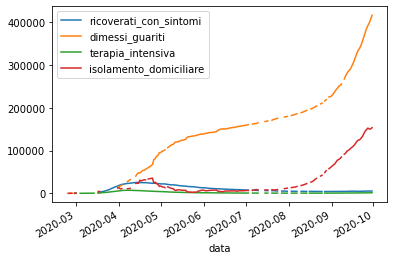

In [11]:
cols = ["totale_casi", "totale_positivi", "totale_ospedalizzati", "ricoverati_con_sintomi", "dimessi_guariti", "terapia_intensiva"]
# g = sns.lineplot("data", data=p_df[cols])
cols = ["data", "ricoverati_con_sintomi", "dimessi_guariti", "terapia_intensiva", "isolamento_domiciliare"]
p_df[cols].plot(x="data")

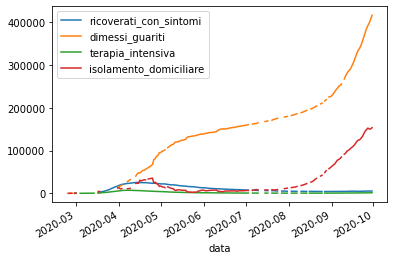

In [12]:
cols = ["totale_casi", "totale_positivi", "totale_ospedalizzati", "ricoverati_con_sintomi", "dimessi_guariti", "terapia_intensiva"]
# g = sns.lineplot("data", data=p_df[cols])
cols = ["data", "ricoverati_con_sintomi", "dimessi_guariti", "terapia_intensiva", "isolamento_domiciliare"]
p_df[cols].plot(x="data")

In [13]:
p_df.to_csv("./fr_data_processed.csv")